# TSF Task 3: Exploratory Data Analysis

# Author: Spriha Ghosh

## Problem: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

### Description: As a business manager, try to find out the weak areas where you can work to make more profit.What all business problems you can derive by exploring the data?


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [57]:
dataset = pd.read_csv("SampleSuperstore.csv")

In [6]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
dataset.shape 

(9994, 13)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Cleaning

In [12]:
dataset.duplicated().sum() #Handling Duplicated Values

17

In [13]:
dataset[dataset.duplicated()] # Display duplicate data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [14]:
df.drop_duplicates(subset=None,keep='first',inplace=True) # Removing duplicate values
df.duplicated().sum()

NameError: name 'df' is not defined

In [15]:
dataset.nunique() # Displaying the unique data 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Dropping Irrelevant Columns

In [16]:
dataset_retail=dataset.copy()

In [17]:
dataset_retail=dataset_retail.drop(['Postal Code','Country'],axis=1)

In [18]:
dataset_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Correlation

In [19]:
corr_mat = dataset_retail.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


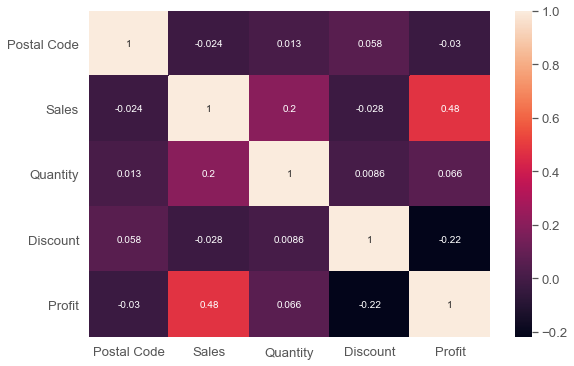

In [56]:
#create a heatmap to demonstrate the correlation magnitude among the variables
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataset.corr(), annot= True)
plt.show()

- Sales and Profit are 48% correlated
- Discount and Profit are negatively correlated
- Quantity is negatively correlated with Discount

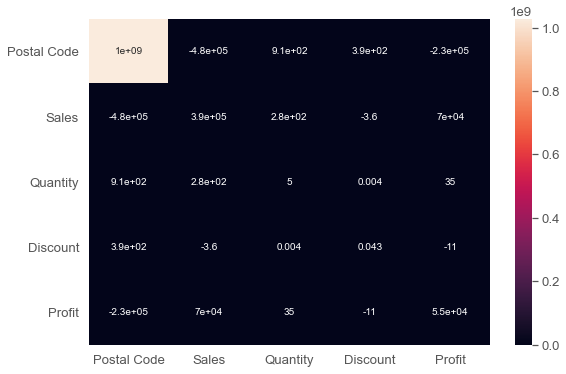

In [55]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataset.cov(), annot= True)
plt.show()

# Removing Outliers
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [21]:
sorted_data = dataset_retail.sort_values(by='Sales', ascending = False) # Calculating Z-score
sorted_data['Z-Score'] = (sorted_data.Sales - sorted_data.Sales.mean()) / sorted_data.Sales.std()
sorted_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


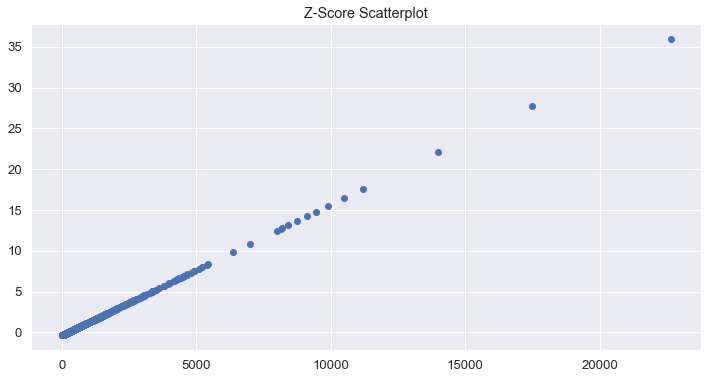

In [22]:
fig, ax = plt.subplots(figsize=(12,6))  # Z-score Scatterplot
ax.scatter(sorted_data['Sales'], sorted_data['Z-Score'])
plt.title('Z-Score Scatterplot')
plt.show()

In [23]:
sorted_data = sorted_data[sorted_data['Z-Score']<3]  #Defining threshold
sorted_data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-Score
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.967600
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.945008
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.937666
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.927282
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.899344
9615,First Class,Corporate,Seattle,Washington,West,Office Supplies,Binders,2033.584,2,0.2,762.5940,2.894088
3150,First Class,Consumer,Newark,Ohio,East,Technology,Accessories,2025.360,6,0.2,607.6080,2.880892
9490,Standard Class,Consumer,San Francisco,California,West,Office Supplies,Binders,2022.272,8,0.2,682.5168,2.875938
6879,Second Class,Home Office,Seattle,Washington,West,Furniture,Chairs,2003.920,5,0.2,125.2450,2.846492
5918,Standard Class,Consumer,New York City,New York,East,Furniture,Bookcases,2003.920,5,0.2,-25.0490,2.846492


In [24]:
dataset_retail=sorted_data
dataset_retail=dataset_retail.drop(['Z-Score'],axis=1)
dataset_retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348


In [53]:
dataset.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# Univariate Analysis

Represent Feature Count Using Bar Graph

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

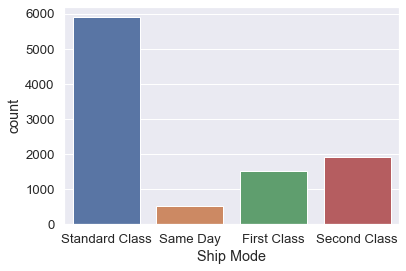

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x=dataset_retail['Ship Mode'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

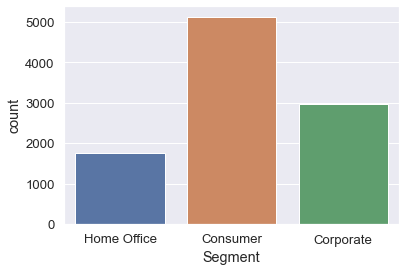

In [26]:
sns.countplot(x=dataset_retail['Segment'])

<AxesSubplot:xlabel='Category', ylabel='count'>

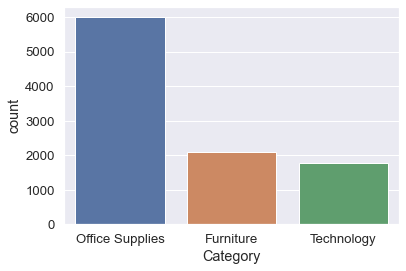

In [27]:
sns.countplot(x=dataset_retail['Category'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Storage'),
  Text(1, 0, 'Tables'),
  Text(2, 0, 'Binders'),
  Text(3, 0, 'Chairs'),
  Text(4, 0, 'Accessories'),
  Text(5, 0, 'Bookcases'),
  Text(6, 0, 'Phones'),
  Text(7, 0, 'Copiers'),
  Text(8, 0, 'Appliances'),
  Text(9, 0, 'Machines'),
  Text(10, 0, 'Supplies'),
  Text(11, 0, 'Furnishings'),
  Text(12, 0, 'Art'),
  Text(13, 0, 'Labels'),
  Text(14, 0, 'Paper'),
  Text(15, 0, 'Envelopes'),
  Text(16, 0, 'Fasteners')])

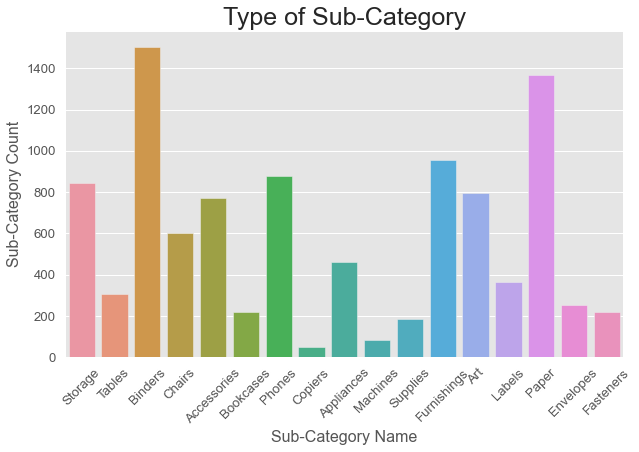

In [28]:
plt.style.use('ggplot')
plt.figure(figsize= (10,6))
ax = sns.countplot(x = "Sub-Category", data = dataset_retail)
ax.set_title("Type of Sub-Category", fontsize = 25)
ax.set_xlabel("Sub-Category Name", fontsize = 16,)
ax.set_ylabel("Sub-Category Count", fontsize = 16)
plt.xticks(rotation=45)

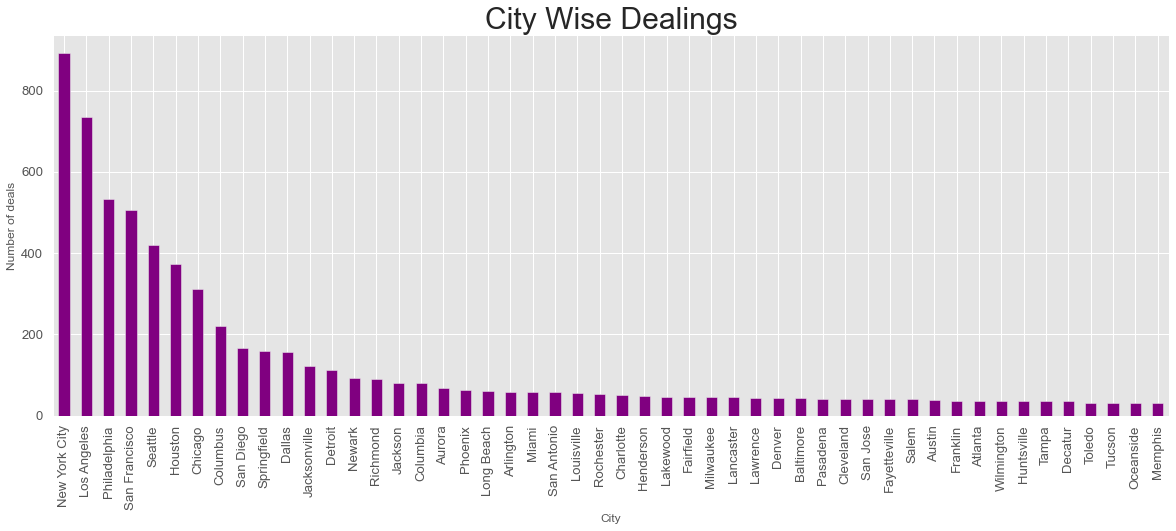

In [29]:
dataset_city = dataset_retail['City'].value_counts()
dataset_city=dataset_city.head(50)
dataset_city.plot(kind='bar',figsize=(20,7),color='purple')
plt.ylabel('Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 30)
plt.show()

Sales are highest In NYC, followed by LA and Philadelphia

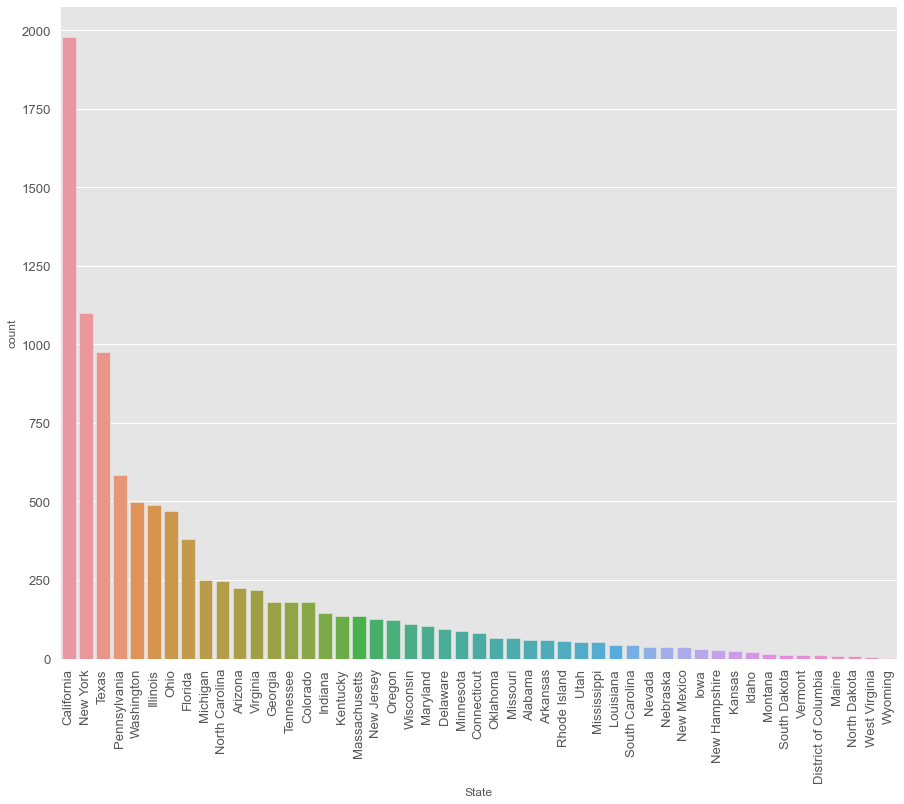

In [30]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=dataset_retail,order=dataset['State'].value_counts().index)
plt.xticks(rotation=90)

plt.show()

California and New York are states with the highest sales

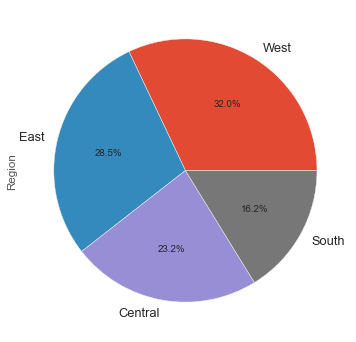

In [31]:
plt.figure(figsize =(8, 5), dpi=70)
dataset['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.tight_layout();

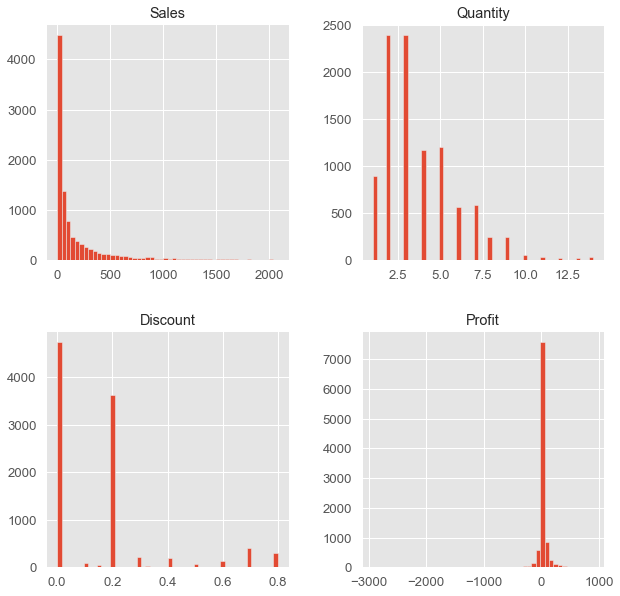

In [32]:
dataset_retail.hist(figsize=(10,10),bins=50)
plt.show()

Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

# Multivariate Analysis

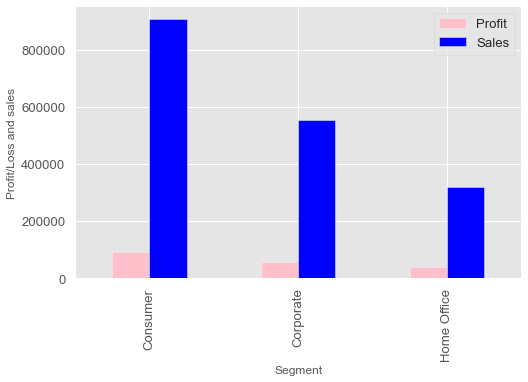

In [33]:
dataset_retail.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

There is higher sales and profit of Consumer and the Home Office has the least sales and profit in relation to segments.

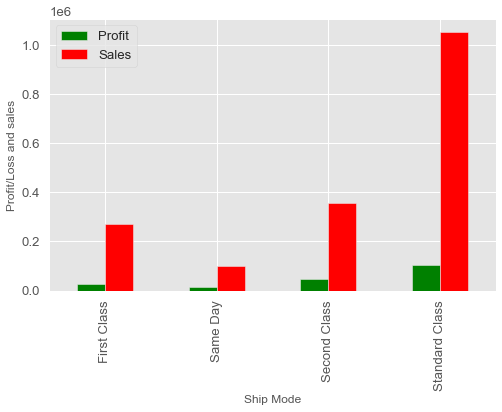

In [34]:
dataset_retail.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

There is higher sales when products are shipperd using Standard class ship mode.
People uses Standard Class more than any other ship mode.
Same Day ship mode is least used by customers.

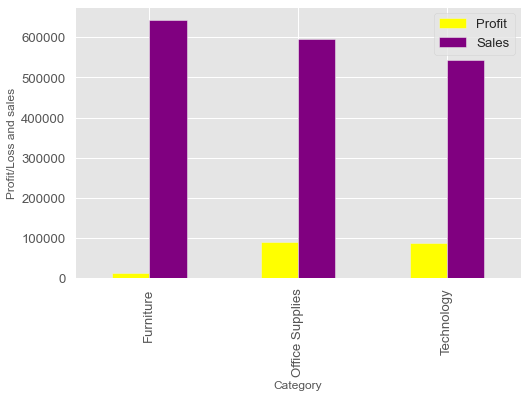

In [35]:
dataset_retail.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Technology category has the lowest sale but high profit
Furniture category has high sales but less profit.

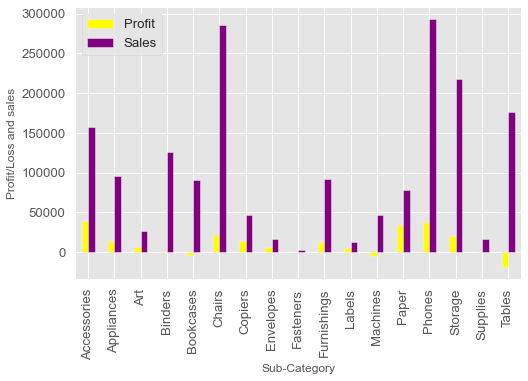

In [36]:
dataset_retail.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Phones and Chairs has same no of sales but phone creates more profit than chairs.
Fasteners has least sales with no profit.
Bookcases and tables has good sales but there is loss.

The sales profit ratio is highest in West Region
The sales profit ratio is least in Central Region

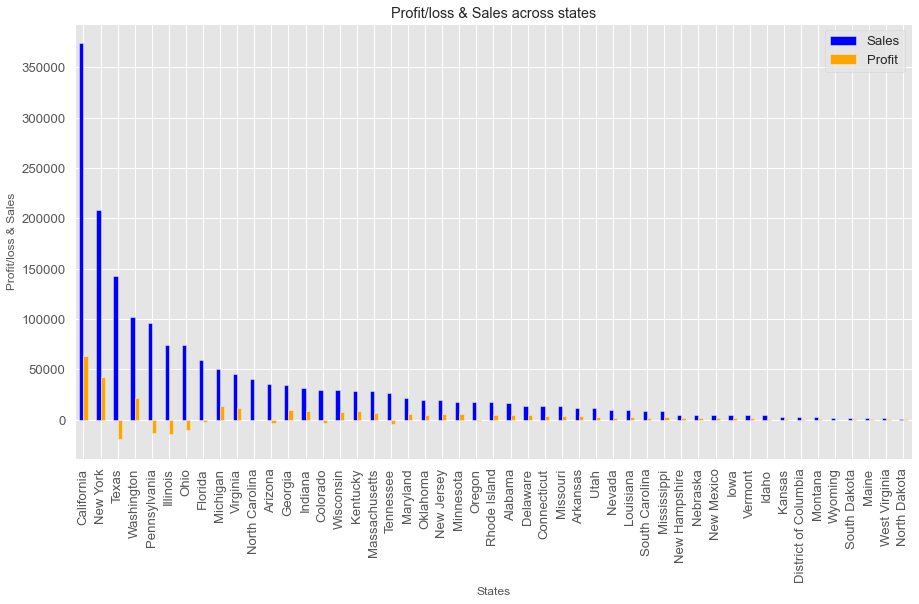

In [37]:
ps = dataset_retail.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

California and New York has high sales-profit ratio
Texas is 3rd country with high sales but there is a loss.

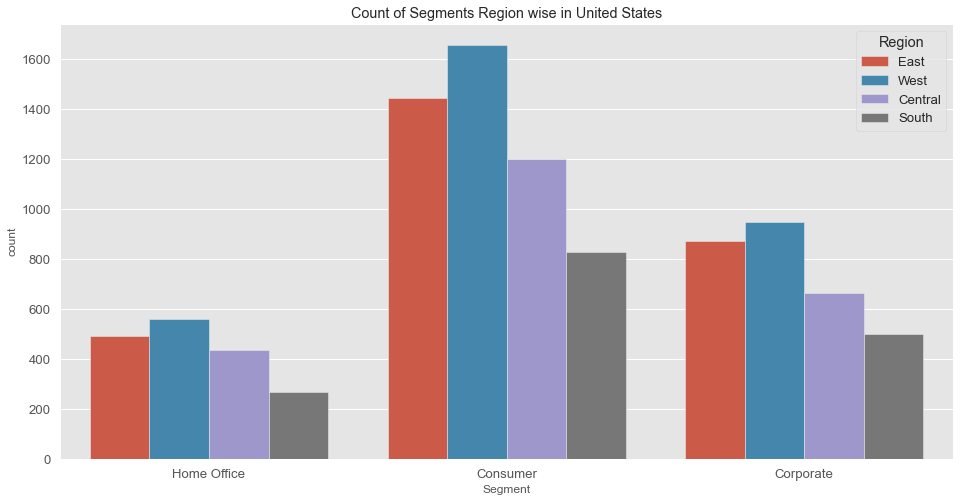

In [38]:
# Count of Segment region wise
plt.figure(figsize=(16,8))
sns.countplot(x="Segment", hue="Region", data=dataset_retail)
plt.title('Count of Segments Region wise in United States')
plt.show()

Consumer segment has a good record of sales in all regions.
Home Office has least sales in all regions.

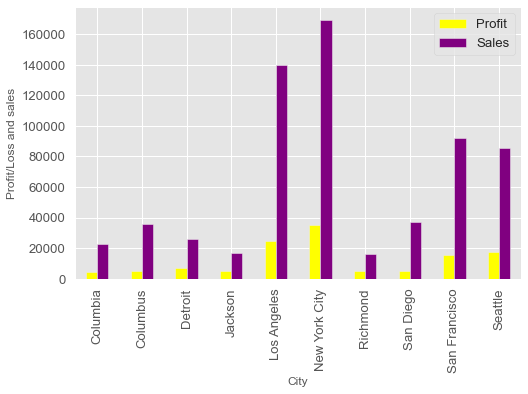

In [39]:
# Top 10 City wise Profit and Sales
dataset_retail_top_10_cities = dataset_retail.groupby("City")[["Profit", "Sales"]].sum().reset_index().sort_values(by="Profit",ascending=False)
new_dataset=dataset_retail_top_10_cities.head(10)
new_dataset.groupby('City')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

New York City and Los Angeles has highest sales-profit ratio

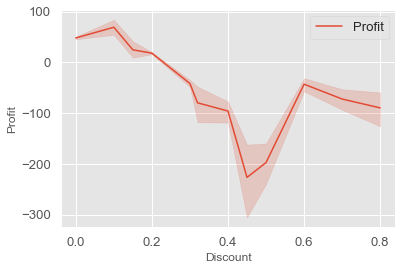

In [40]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=dataset_retail)
plt.legend()
plt.show()

Upto 0-10% discount and more than 60% discount generates profit
40% discount has very less profit

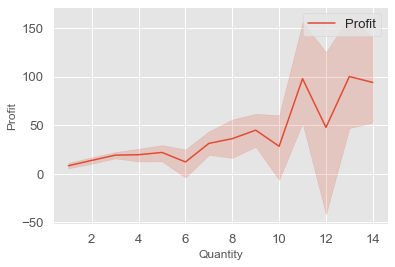

In [41]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=dataset_retail)
plt.legend()
plt.show()

Items more than 10 slightly tends to have more profit

# Visualizing  The Relationship And Distributions

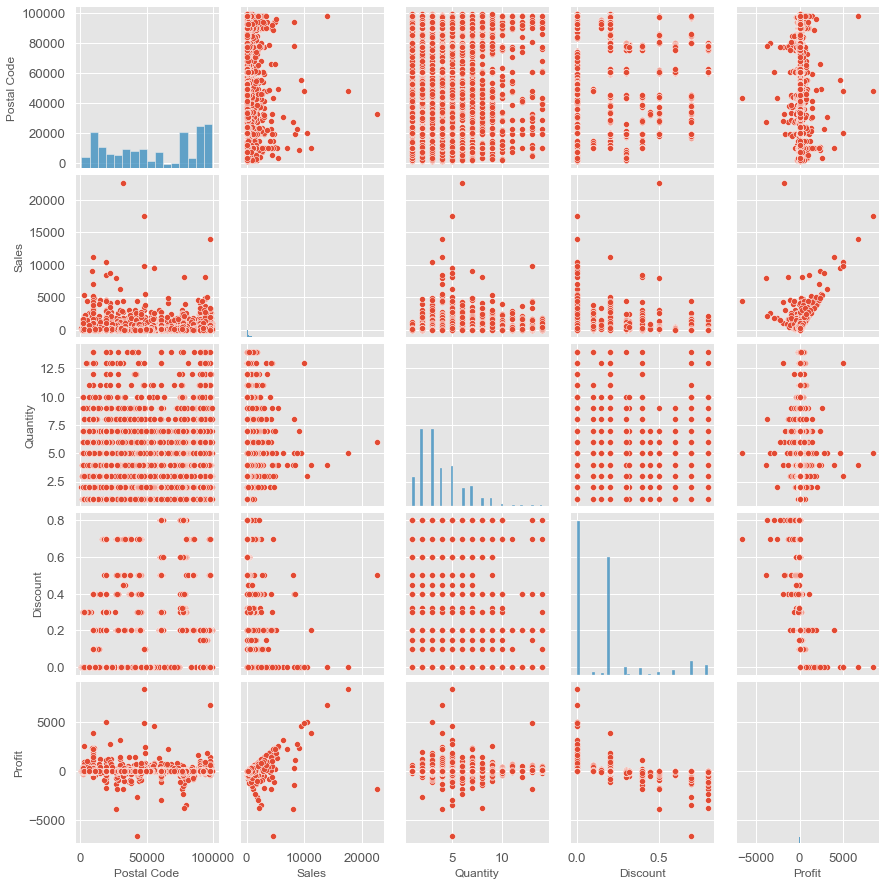

In [43]:
sns.pairplot(dataset)

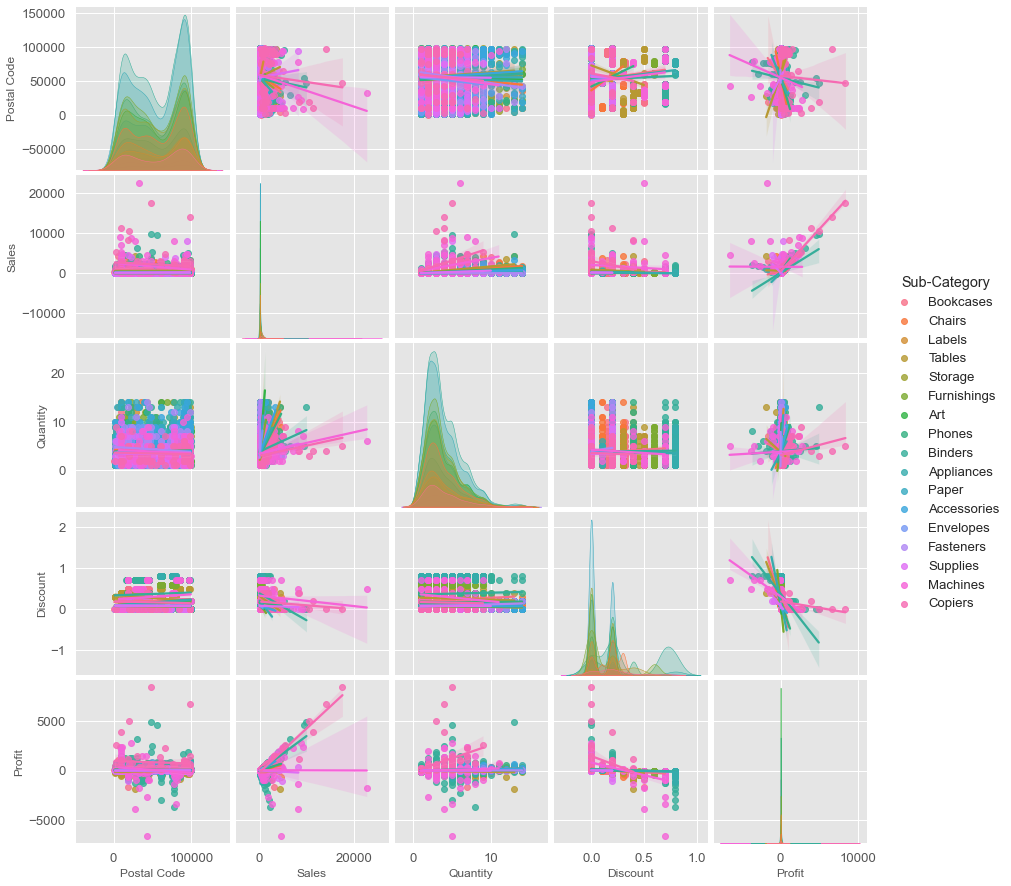

In [51]:
figsize=(20,25)
sns.pairplot(dataset,hue='Sub-Category',kind="reg",diag_kind='kde')

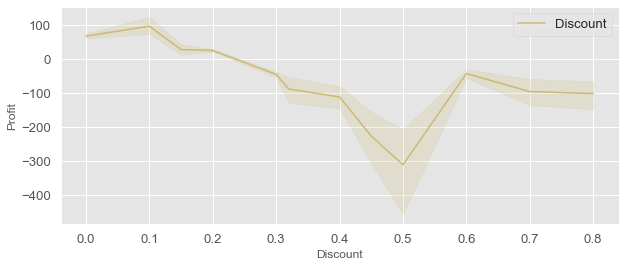

In [52]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=dataset , color='y',label='Discount')
plt.legend()
plt.show()

In [48]:
def state_data_viewer(states):
  
    product_data = dataset.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

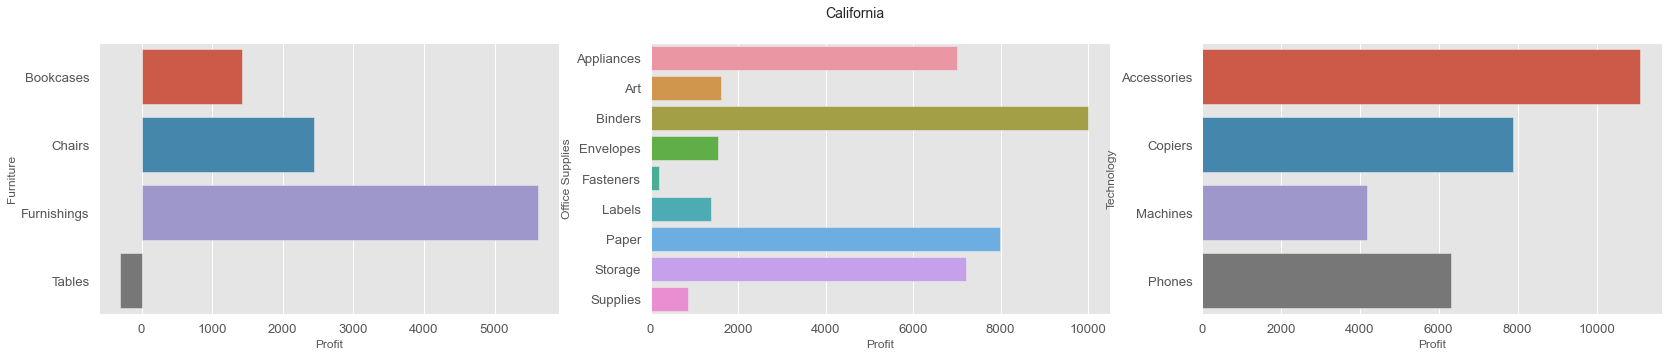

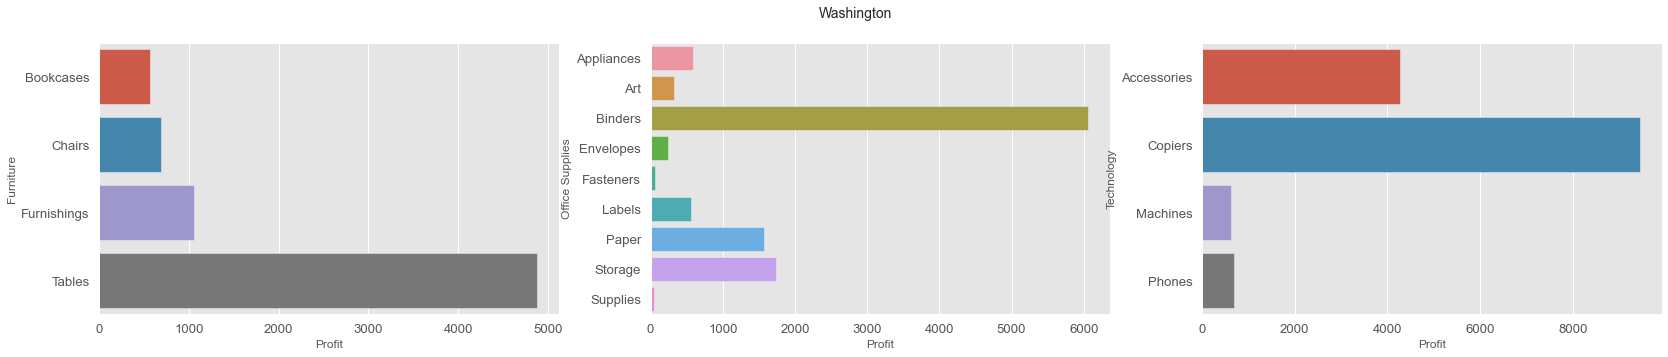

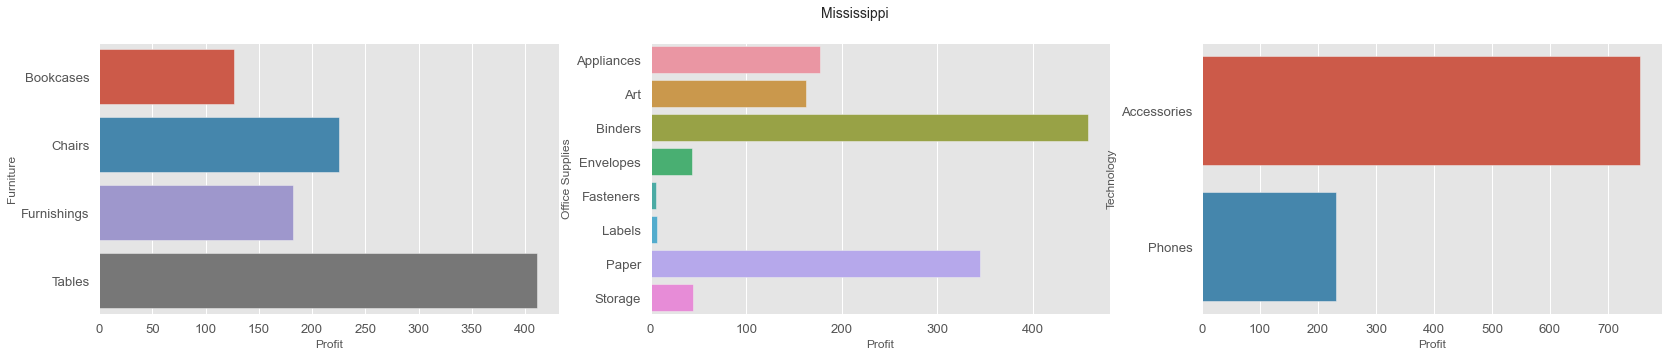

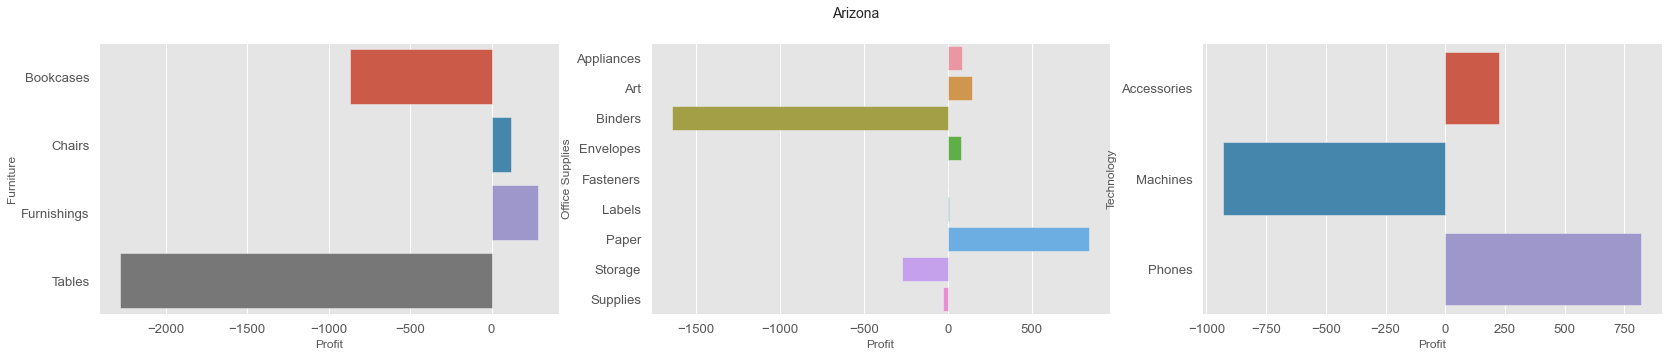

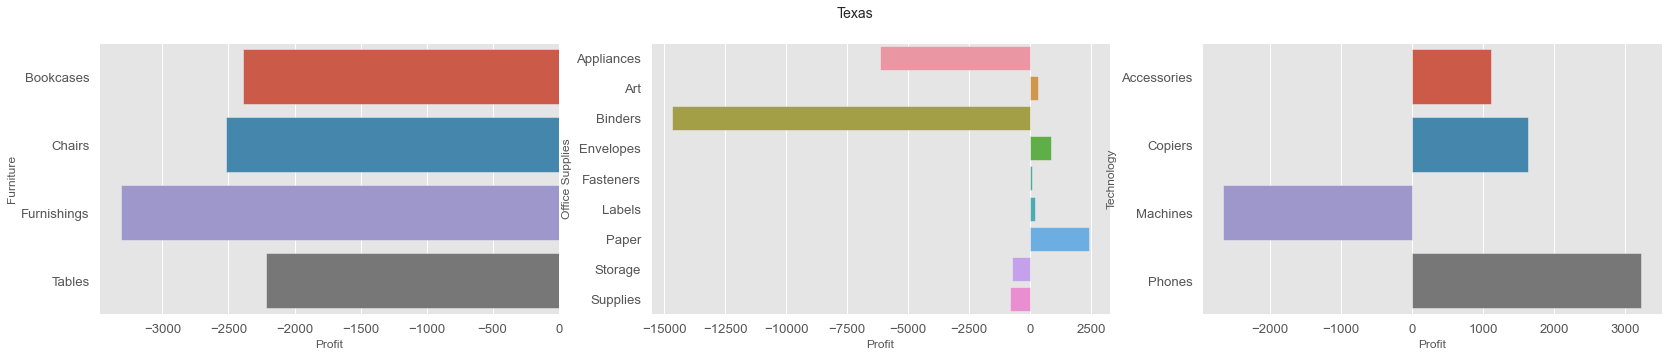

In [49]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

# Conclusion- Successful Derivation of Business Output with EDA